In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ImageDataset import FolderImageDataset

# reload the imported files if changed
%load_ext autoreload
%autoreload 2

In [59]:
# 40k images
path2 = r"C:\Users\ЛФКИТ-3\Documents\quantTechLab\data\img2_stripes"
# 5.8k images
path3 = r"C:\Users\ЛФКИТ-3\Documents\quantTechLab\data\img3_stripes"


In [32]:
%%time
dst3 = FolderImageDataset(path3, end=1)

Wall time: 2min 49s


In [33]:
%%time 
intensity = np.zeros(len(dst3))
phases = np.zeros(len(dst3))

# this is not a pythonic way of iteration, see https://www.youtube.com/watch?v=OSGv2VnC0go  ~5-10 min
for i in range(len(dst3)):
    intensity[i] = dst3[i][0].mean()
    phases[i] = dst3[i][1] 


Wall time: 7.19 s


In [34]:
%%time
intensity = np.mean(dst3.images, axis=(1,2,3))

Wall time: 6.27 s


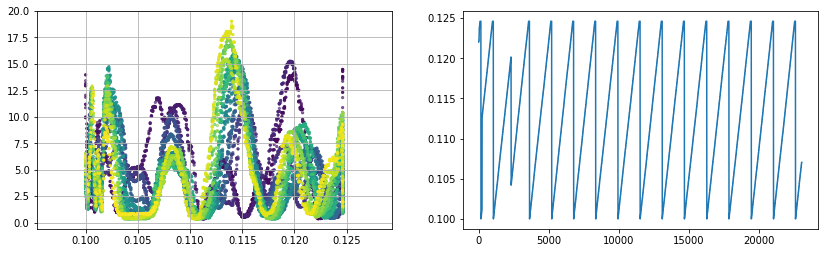

In [57]:
f,ax = plt.subplots(1,2, figsize=(14,4))
ax[0].grid()

ax[0].scatter(dst3.target, intensity, s=5, c=(range(len(dst3))), alpha=0.6)
ax[1].plot(dst3.target)

In [52]:
import sys
print("dataset takes", sys.getsizeof(dst3.images) / 10**6 ,"MB")


dataset takes 1913.932944 MB


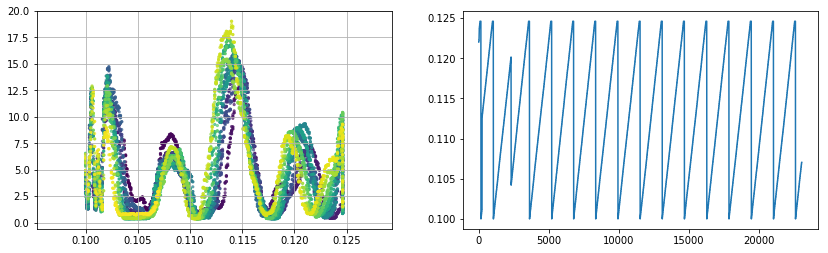

In [58]:
f,ax = plt.subplots(1,2, figsize=(14,4))
ax[0].grid()

ax[0].scatter(dst3.target[7000:], intensity[7000:], s=5, c=(range(len(dst3)-7000)), alpha=0.6)
ax[1].plot(dst3.target)